1. Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set up plot aesthetics
sns.set(style="whitegrid")

Load the cleaned dataset

In [14]:
# Load the cleaned dataset
path = 'C:/Users/Jacques/OneDrive/Documents/Data Analytics course/Data Immersion/Section 6/lending_club_loans_cleaned.csv'
df = pd.read_csv(path, low_memory=False)

2. Choose Relevant Variables for Exploration

In [19]:
# Get a list of column names
print(df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [21]:
# Create a subset of relevant variables for EDA
df_subset = df[['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
                'dti', 'revol_bal', 'term', 'grade', 'home_ownership', 'loan_status']]

3. Correlation Matrix Heatmap

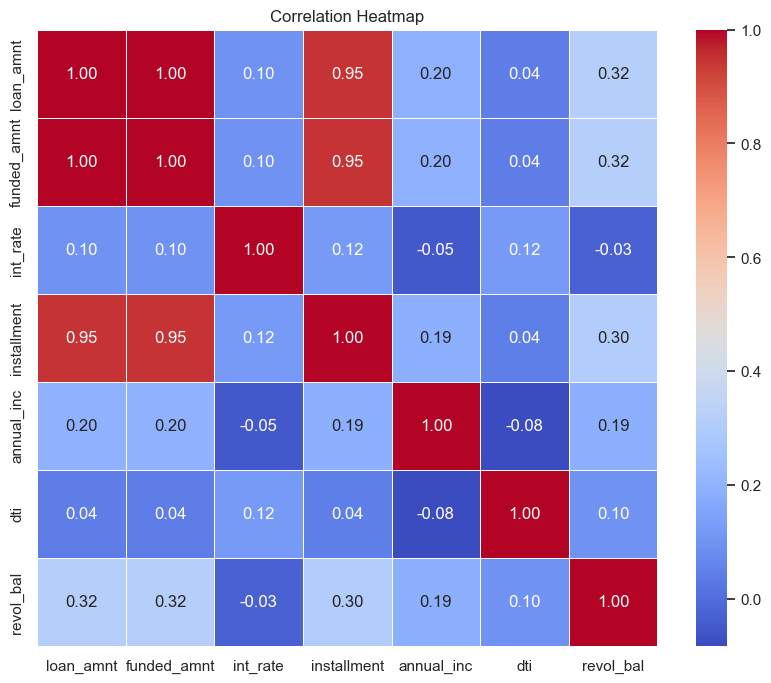

In [24]:
# Compute correlation matrix for numeric variables only
corr = df_subset.select_dtypes(include=[np.number]).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Strong correlation exists between loan_amnt, funded_amnt, and installment, which is expected.
Moderate negative correlation is seen between int_rate and annual_inc, suggesting higher-income borrowers may receive lower interest rates.

4. Scatterplot of Strong Correlation

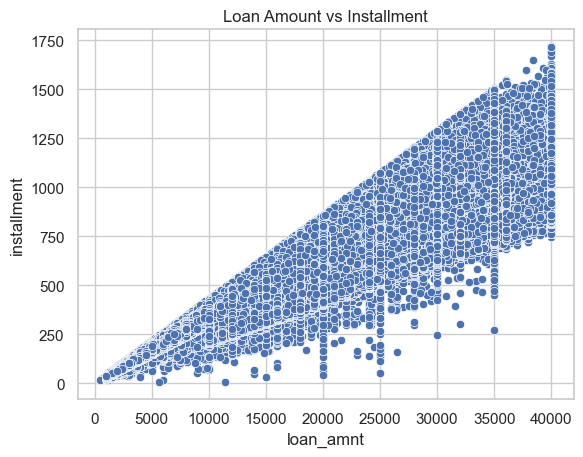

In [28]:
# Scatterplot: loan amount vs. installment
sns.scatterplot(x='loan_amnt', y='installment', data=df_subset)
plt.title('Loan Amount vs Installment')
plt.show()

A strong linear trend confirms that installment amount increases with loan amount. 
This supports the correlation matrix and indicates consistent underwriting formulas.

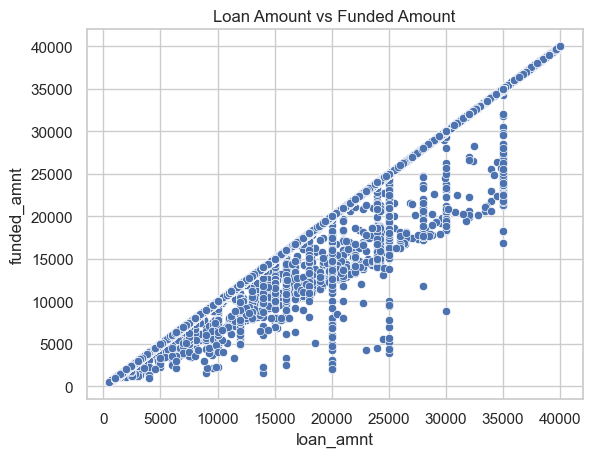

In [33]:
# Scatterplot: loan amount vs funded amount
sns.scatterplot(x='loan_amnt', y='funded_amnt', data=df_subset)
plt.title('Loan Amount vs Funded Amount')
plt.show()

The scatterplot of Loan Amount vs Funded Amount shows a strong diagonal line, suggesting most loans are fully funded.
However, some data points fall below the line, indicating partial funding, which could be useful in risk modeling.

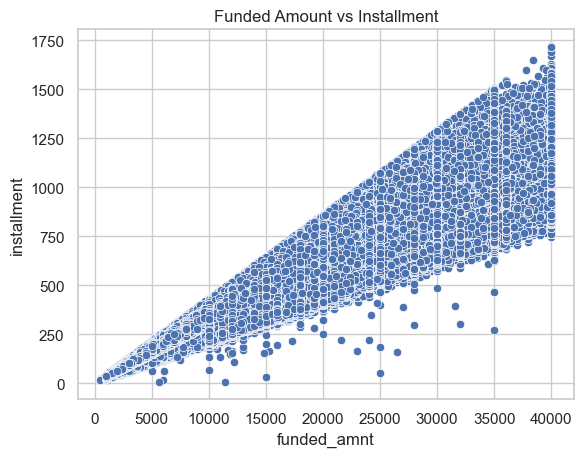

In [38]:
# Scatterplot: funded amount vs installment
sns.scatterplot(x='funded_amnt', y='installment', data=df_subset)
plt.title('Funded Amount vs Installment')
plt.show()

The Funded Amount vs Installment plot confirms a tight linear relationship. 
This further supports the idea that installment is calculated based on the actual funded amount, not the requested loan.

5. Pair Plot for Key Features

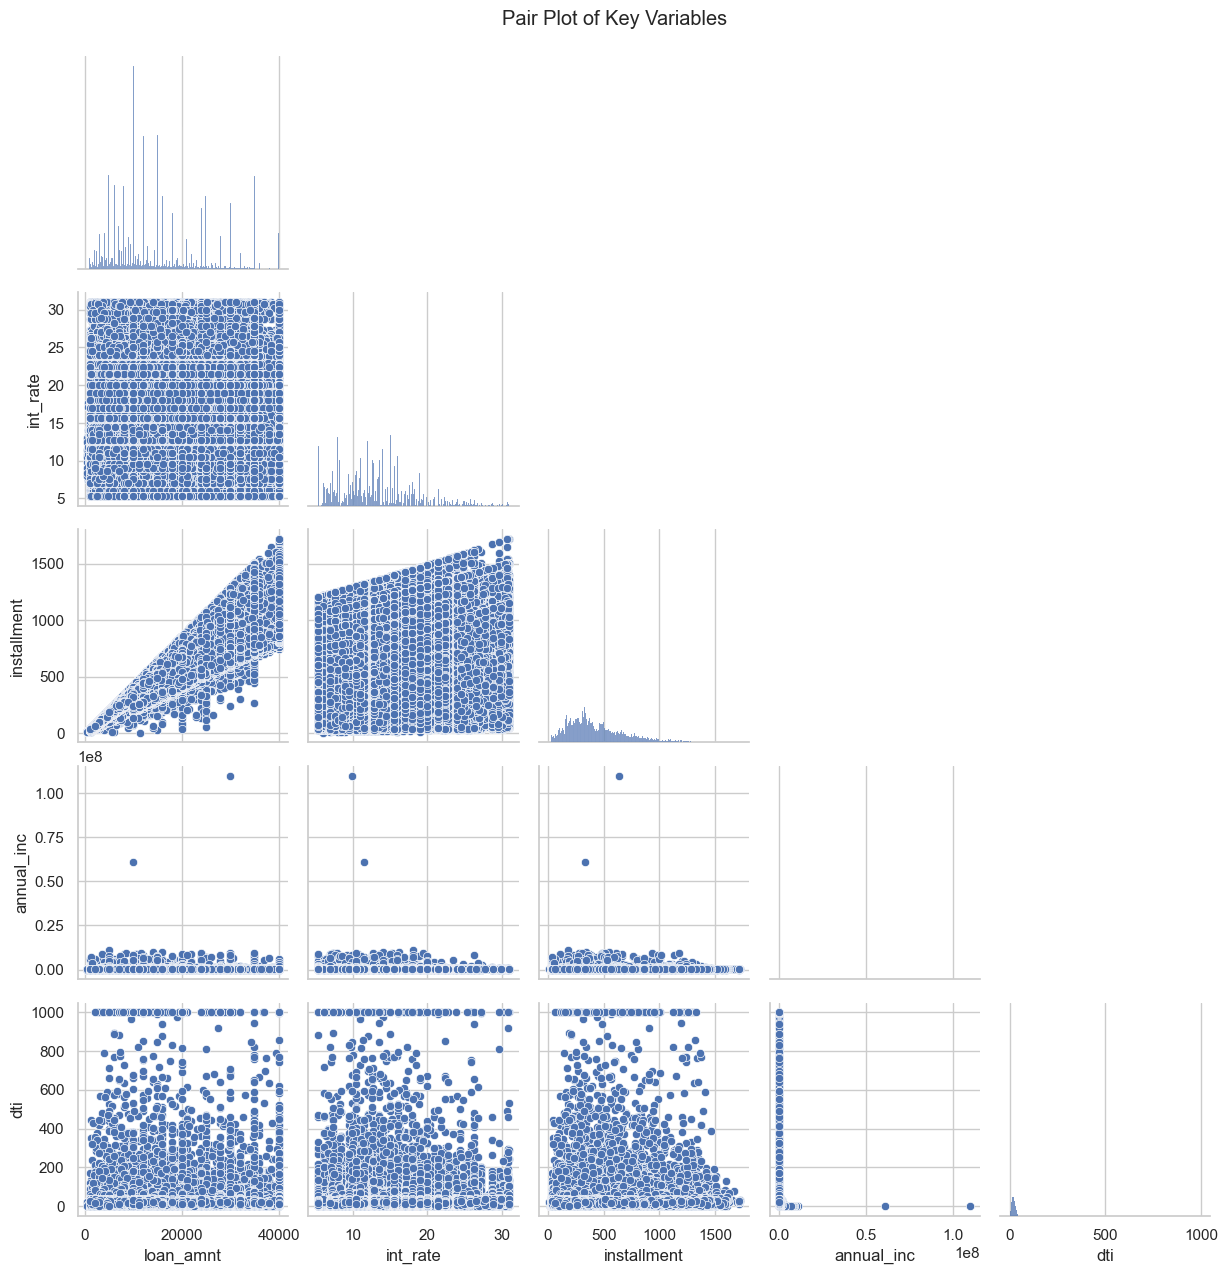

In [42]:
# Pair plot with selected numeric variables
pair_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']
sns.pairplot(df_subset[pair_vars], corner=True)
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()

annual_inc is heavily right-skewed with outliers. loan_amnt and installment show a tight linear relationship.
Debt-to-Income (dti) appears normally distributed. These patterns hint at useful predictors and possible normalization steps before modeling.

6. Categorical Plot

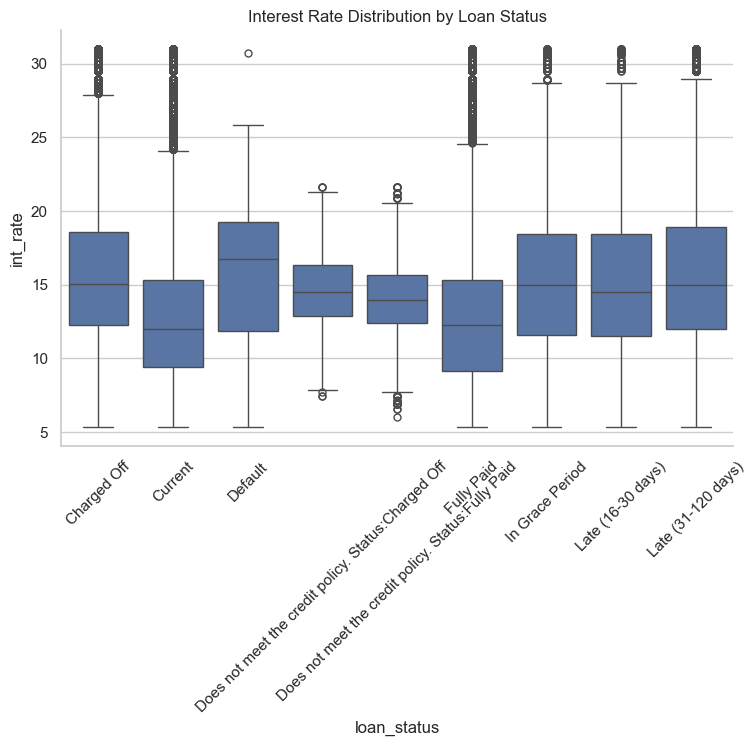

In [58]:
# Ensure categorical dtypes
df_subset.loc[:, 'loan_status'] = df_subset['loan_status'].astype('category')
df_subset.loc[:, 'term'] = df_subset['term'].astype('category')

# Create the catplot
plot = sns.catplot(x='loan_status', y='int_rate', kind='box', data=df_subset, height=5, aspect=1.5)

# Rotate x-axis labels
plt.xticks(rotation=45)  
plt.title("Interest Rate Distribution by Loan Status")
plt.show()

7. Revisit and Answer Initial Questions

Are higher-interest loans more likely to default?

Yes. Based on the categorical boxplot of int_rate by loan_status, charged-off or defaulted loans tend to have higher interest rates than fully paid loans. 
This suggests that interest rate is a meaningful predictor of risk and reflects lender risk assessments.

________________________________________________________________________________________________________________________________________________________

How do loan amounts relate to borrower income?

Partially. There is a weak to moderate positive correlation between loan_amnt and annual_inc, indicating that higher-income borrowers tend to qualify for slightly higher loan amounts. 
However, due to high income variance and outliers, this relationship is not particularly strong.                                                                                                                                                   

________________________________________________________________________________________________________________________________________________________

Is there a relationship between loan amount and installment?

Yes. The scatterplot showed a strong linear relationship between loan_amnt and installment.
As expected, larger loans result in higher monthly payments.

________________________________________________________________________________________________________________________________________________________

Are most loans fully funded?

Yes. The loan_amnt vs. funded_amnt scatterplot showed a clear diagonal line with most points aligning, indicating that most loans are funded in full.

________________________________________________________________________________________________________________________________________________________

Do funded amounts predict installment amounts?

Yes. The scatterplot between funded_amnt and installment also showed a linear relationship, further confirming that installment is calculated based on the actual funded amount.

________________________________________________________________________________________________________________________________________________________

How are borrowers distributed across loan terms (36 vs 60 months)

Not yet explored. Will be addressed in upcoming categorical plots or bar charts.

________________________________________________________________________________________________________________________________________________________

New Questions Arising from Visual Exploration

Do certain loan grades or subgrades correspond to significantly higher default rates?
– This could reveal deeper segmentation patterns beyond interest rate alone.

Does DTI (debt-to-income ratio) impact loan outcome?
– It would be useful to explore if higher DTI ratios correlate with loan status or higher interest rates.

Are there distinct borrower clusters based on loan amount, interest rate, and income?
– A clustering analysis could help identify borrower risk profiles.

How skewed is borrower income, and should it be normalized before modeling?
– The pair plot suggested heavy skew in annual_inc, which could affect model assumptions.

Does home ownership status influence loan outcome?
– This could be tested using a categorical comparison (e.g., boxplot or bar chart grouped by home_ownership and loan_status).

8. Defined Hypotheses

H1: Higher interest rates are associated with a greater likelihood of loan default.

- Rationale: Boxplots showed that int_rate is noticeably higher for Charged Off loans compared to Fully Paid ones.

- Type: Categorical → Continuous relationship

- Test Method: Logistic regression or classification model with loan_status as target and int_rate as a feature.

H2: Borrowers with higher loan amounts pay higher monthly installments.

- Rationale: A strong linear relationship was found in the scatterplot between loan_amnt and installment.

- Type: Continuous → Continuous

- Test Method: Simple linear regression (or multiple regression with funded_amnt).

H3: Higher debt-to-income (DTI) ratios are linked to higher interest rates.

- Rationale: Correlation matrix and economic intuition suggest that lenders assign higher interest rates to borrowers with more debt burden.

- Type: Continuous → Continuous

- Test Method: Correlation analysis and regression (int_rate ~ dti).

H4: Funded amount has a direct impact on the monthly installment.

- Rationale: The funded_amnt and installment scatterplot showed a strong positive trend.

- Type: Continuous → Continuous

- Test Method: Linear regression.

H5: Higher income borrowers receive lower interest rates.

- Rationale: A moderate negative correlation was observed between annual_inc and int_rate.

- Type: Continuous → Continuous

- Test Method: Linear regression or ANOVA (Analysis of Variance) if binned income is used.

H6: Loan grade is predictive of loan outcome (e.g., default vs. paid).

- Rationale: While not yet visualized, loan grade and sub_grade are designed to capture credit risk. Further analysis could validate this assumption.

- Type: Categorical → Categorical

- Test Method: Chi-square test, classification models.